In [1]:
source('../../functions.R')
tcell = readRDS('Data/tcell_e.RDS')
setwd('Figures/Figure 4')

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Loading required package: cowplot
Warning message:
"package 'cowplot' was built under R version 3.5.3"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: Matrix
Warning message:
"package 'feather' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: viridisLite
Warning message:
"package 'tidyr' was built under R version 3.5.3"
Attaching package: 'tidyr'

The following object

Using p as value column: use value.var to override.


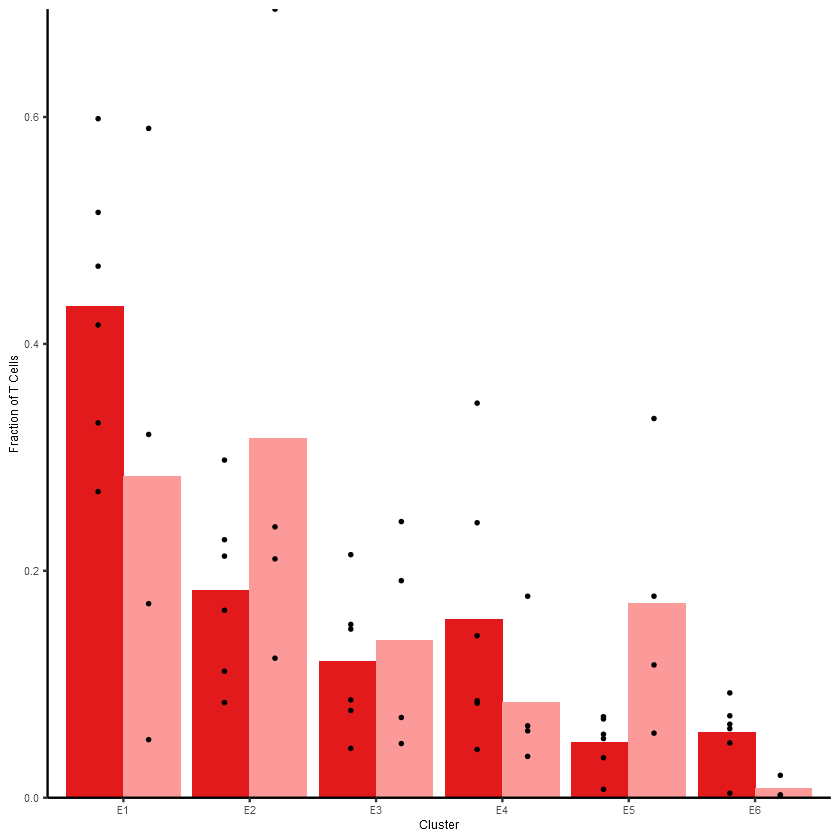

In [2]:
# frequency of each cluster by patient ----

tcell@meta.data$diag = tcell@meta.data$diagnosis
df = tcell@meta.data %>% group_by(diag, patient, plot_cluster) %>% summarize(count = n()) %>% 
  complete( plot_cluster,fill = list(count= 0))  %>%
  mutate(total = sum(count), p = count/total, sd = sqrt(p*(1-p)/sum(count)))


df$diag = as.factor(as.character(df$diag))
df2 = df %>% group_by(diag, plot_cluster) %>% summarize(p_avg = mean(p))


# all populations
ggplot(df2) + 
  geom_col(data =df2, aes(x = plot_cluster, y = p_avg, fill = diag), position = 'dodge') +  
  scale_fill_manual(values = brewer.pal(6, 'Paired')[c(6,5)]) +
  geom_point(data = df, aes(x = plot_cluster,y = p, group = diag), position = position_dodge(width = .8), size = .5) + theme_bw() + 
  labs(x = 'Cluster', y = 'Fraction of T Cells') + guides(fill = FALSE)+ remove_grid   + Axis_themes  + theme(panel.border = element_blank(), axis.line = element_line(color = 'black')) +
    scale_x_discrete(limits = c('E1', 'E2', 'E3', 'E4', 'E5', 'E6')) + scale_y_continuous(expand = c(0,0))

summary_frame =dcast(df[,c(1,2,3,6)], formula = patient+diag~plot_cluster)

write.csv(summary_frame, '4a.csv')

ggsave('proportion_bars.pdf', height = 2.5, width = 2, useDingbats = FALSE)

In [3]:
wilcox.test(p~diag, data = df %>% filter(plot_cluster == 'E1'))
wilcox.test(p~diag, data = df %>% filter(plot_cluster == 'E2'))
wilcox.test(p~diag, data = df %>% filter(plot_cluster == 'E3'))
wilcox.test(p~diag, data = df %>% filter(plot_cluster == 'E4'))
wilcox.test(p~diag, data = df %>% filter(plot_cluster == 'E5'))
wilcox.test(p~diag, data = df %>% filter(plot_cluster == 'E6'))


	Wilcoxon rank sum test

data:  p by diag
W = 18, p-value = 0.2571
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p by diag
W = 8, p-value = 0.4762
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p by diag
W = 11, p-value = 0.9143
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p by diag
W = 18, p-value = 0.2571
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p by diag
W = 2, p-value = 0.0381
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  p by diag
W = 17, p-value = 0.04762
alternative hypothesis: true location shift is not equal to 0


ci,patient,plot_cluster,n,p,path
Diseased_E,292,E6,14,0.064814815,17.666667
Diseased_E,354,E6,31,0.072261072,32.333333
Diseased_E,451,E6,1,0.003968254,16.000000
Diseased_E,471,E6,13,0.048327138,9.333333
Diseased_E,474,E6,165,0.092436975,26.666667
Diseased_E,475,E6,7,0.060869565,26.666667
Remission_E,249,E6,1,0.002439024,6.000000
Remission_E,355,E6,3,0.019736842,0.000000
Remission_E,392,E6,1,0.002277904,0.000000
Remission_E,468,E6,0,0.000000000,0.000000


`geom_smooth()` using formula 'y ~ x'


`geom_smooth()` using formula 'y ~ x'


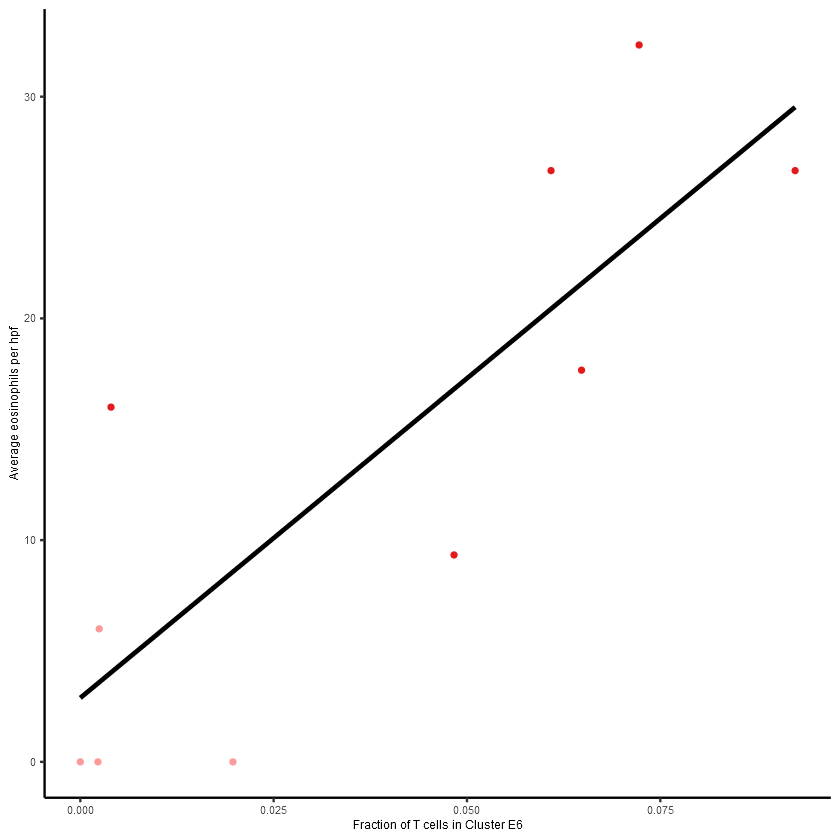

In [4]:
# the first thing to look at here is propbably the correlation plot (eos/hpf vs eos/Seq-Well)
counts = read.csv('eocounts.csv', row.names = 1, stringsAsFactors = FALSE)
counts$avg = apply(counts, 1, function(x) sum(x)/3)
tcell@meta.data$patient = factor(tcell@meta.data$patient)
tcell@meta.data$ci = factor(tcell@meta.data$ci)
tcell@meta.data$plot_cluster = factor(tcell@meta.data$plot_cluster)
df = tcell@meta.data %>% group_by(ci, patient,plot_cluster) %>% 
    summarize(n = n())  %>%
    complete(plot_cluster,fill = list(n= 0))%>% 
    mutate(p = n/sum(n)) %>%
    filter(plot_cluster== 'E6')

df$path = counts[as.character(df$patient), 'avg'] 
df 

ggplot(df, aes(x = p, y = path, color = ci)) + geom_point(size = 1) + geom_smooth(method = 'lm', color = 'black', se = FALSE) + remove_grid + Axis_themes+
        labs(x = 'Fraction of T cells in Cluster E6', y = 'Average eosinophils per hpf') +
    scale_color_manual(values = tissue_palette) + guides(color = FALSE) + theme(panel.border = element_blank(), axis.line = element_line(color = 'black'))
ggsave('correlation.pdf', height = 2.5, width = 2, useDingbats = FALSE)
write.csv(df, 'e6_fraction.csv')

In [5]:
fit = lm(p~path, data = df)
summary(fit)


Call:
lm(formula = p ~ path, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.038685 -0.008219 -0.003996  0.017340  0.024771 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.0051348  0.0102043   0.503  0.62839   
path        0.0023449  0.0005741   4.084  0.00351 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02106 on 8 degrees of freedom
Multiple R-squared:  0.6759,	Adjusted R-squared:  0.6353 
F-statistic: 16.68 on 1 and 8 DF,  p-value: 0.003513


In [6]:
cor.test(df$p, df$path, method = 'spearman')

Warning message in cor.test.default(df$p, df$path, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  df$p and df$path
S = 22.829, p-value = 0.001352
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8616404 


phenotype,ALOX5AP,CHDH,GK,DGKE,LPCAT2,SLC27A2,ACSL4,ACADVL,PPARG,HPGDS,PTGS2,PLA2G16
E1,0.4499950,0.003709250,0.007303525,0.1572603,0.008062235,0.06668803,0.1489248,0.2817812,0.001495893,0.006886265,0.007569781,0.10482614
E2,0.3175045,0.008189722,0.013813479,0.1756473,0.004173159,0.05356498,0.1905882,0.3220078,0.007381478,0.004568776,0.010704622,0.12605890
E3,0.1955170,0.076529269,0.054513591,0.1779019,0.019188330,0.01204923,0.2475745,0.4306668,0.047590699,0.028059527,0.005842093,0.05769629
E4,0.4987875,0.018719527,0.020980609,0.1311452,0.034491645,0.06829671,0.1246649,0.4806285,0.002922566,0.015614499,0.225881914,0.17029428
E5,0.6076699,0.006397532,0.005676210,0.1240373,0.003640659,0.01736728,0.1902871,0.2835823,0.145617363,0.004686711,0.014565973,0.03910033
E6,1.6386010,1.176741166,0.263016567,0.5969741,0.527797094,0.47542513,1.3951906,1.0836969,0.526221854,1.061785042,0.651860127,0.61452090


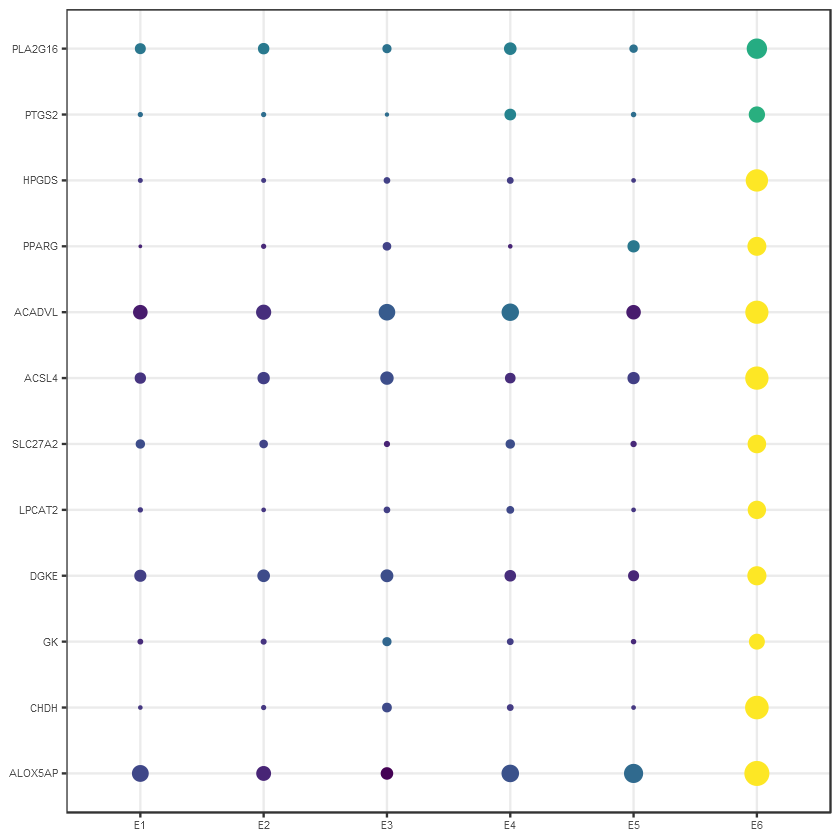

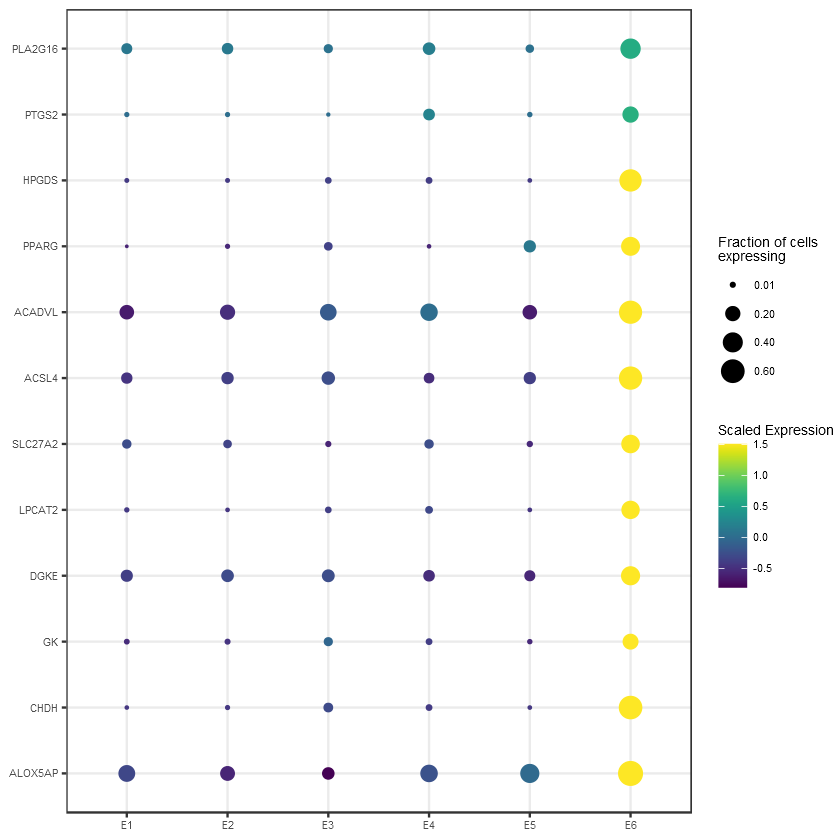

In [7]:
# Panel 4C: expression of lipid metabolism-related genes
genes = rev(c('PLA2G16', 'PTGS2', 'HPGDS', 'PPARG','ACADVL', 'ACSL4', 'SLC27A2', 'LPCAT2', 'DGKE', 'GK', 'CHDH', 'ALOX5AP'))



data = as.data.frame(t(as.matrix(tcell@data[genes,])))
data$phenotype = tcell@meta.data$plot_cluster
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame()
df_exp
df_exp[,2:(length(genes)-1)] = scale(df_exp[,2:(length(genes)-1)])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype)%>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value > 1.5] =1.5
df_exp$value[df_exp$value < -1] =-1

df_exp$pct = df_pct$value
df_exp$value = as.vector(df_exp$value)

ggplot(as.data.frame(df_exp), aes(x = phenotype, y = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + 
scale_y_discrete() + theme_bw()  + 
labs(color = "Scaled Expression", size = 'Fraction of cells\nexpressing') + Axis_themes+ theme(axis.title = element_blank()) + guides(size = FALSE, color = FALSE)+ scale_size_continuous(range = c(.01, 6), breaks = c(0,.2, .4))
ggsave('markergenes.pdf', width = 2.2, height =2.5, useDingbats = FALSE)



ggplot(as.data.frame(df_exp), aes(x = phenotype, y = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + 
scale_y_discrete() + theme_bw()  + 
labs(color = "Scaled Expression", size = 'Fraction of cells\nexpressing') + Axis_themes+ theme(axis.title = element_blank()) + scale_size_continuous(range = c(.01, 6), breaks = c(0.01,.2, .4, .6))
ggsave('markergeneslegend.pdf', width = 4, height =4, useDingbats = FALSE)

In [8]:
# pathway scoring using AddModuleScore
# perform scoring for both Kegg and Hallmarks
library(fgsea)
library(GSA)
kegg = GSA.read.gmt("kegg.gmt")
for (i in 1:length(kegg$geneset.names)) {
  tcell = AddModuleScore(tcell, genes.list = kegg[[1]][i], enrich.name = kegg$geneset.names[i]) 
}

# pathway scoring
library(fgsea)
library(GSA)
kegg = GSA.read.gmt("biocarta.gmt")
for (i in 1:length(kegg$geneset.names)) {
  tcell = AddModuleScore(tcell, genes.list = kegg[[1]][i], enrich.name = kegg$geneset.names[i])
}

Loading required package: Rcpp
Warning message:
"package 'Rcpp' was built under R version 3.5.3"Warning message:
"package 'GSA' was built under R version 3.5.2"

1234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798991001011021031041051061071081091101111121131141151161171181191201211221231241251261271281291301311321331341351361371381391401411421431441451461471481491501511521531541551561571581591601611621631641651661671681691701711721731741751761771781791801811821831841851861
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
16

In [9]:
library(GSA)
kegg = GSA.read.gmt("kegg.gmt")
pvals =c()
for (i in 1:length(kegg$geneset.names)) {
  data = tcell@meta.data[,paste0(kegg$geneset.names[i],1)]
  result = wilcox.test(data[tcell@meta.data$res.0.3 ==5], data[tcell@meta.data$res.0.3!= 5], 
                  alternative = 'greater')
  pvals = c(pvals, result$p.value)
}
df = data.frame(path = kegg$geneset.names, pvals = pvals)
df = df[order(df$pvals),]
df$pvals = p.adjust(df$pvals)
df$origin = 'kegg'
df$path = as.character(df$path)
kegg = GSA.read.gmt('biocarta.gmt')
pvals =c()
for (i in 1:length(kegg$geneset.names)) {
  data = tcell@meta.data[,paste0(kegg$geneset.names[i],1)]
  result = wilcox.test(data[tcell@meta.data$res.0.3 ==5], data[tcell@meta.data$res.0.3!= 5], 
                  alternative = 'greater')
  pvals = c(pvals, result$p.value)
}
df2 = data.frame(path = kegg$geneset.names, pvals = pvals)
df2 = df2[order(df2$pvals),]
df2$pvals = p.adjust(df2$pvals)
df2$origin = 'biocarta'
df2$path = as.character(df2$path)
df = rbind(df, df2)
df = df[order(df$pvals),]

1234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798991001011021031041051061071081091101111121131141151161171181191201211221231241251261271281291301311321331341351361371381391401411421431441451461471481491501511521531541551561571581591601611621631641651661671681691701711721731741751761771781791801811821831841851861
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
16

Warning message:
"package 'stringr' was built under R version 3.5.3"

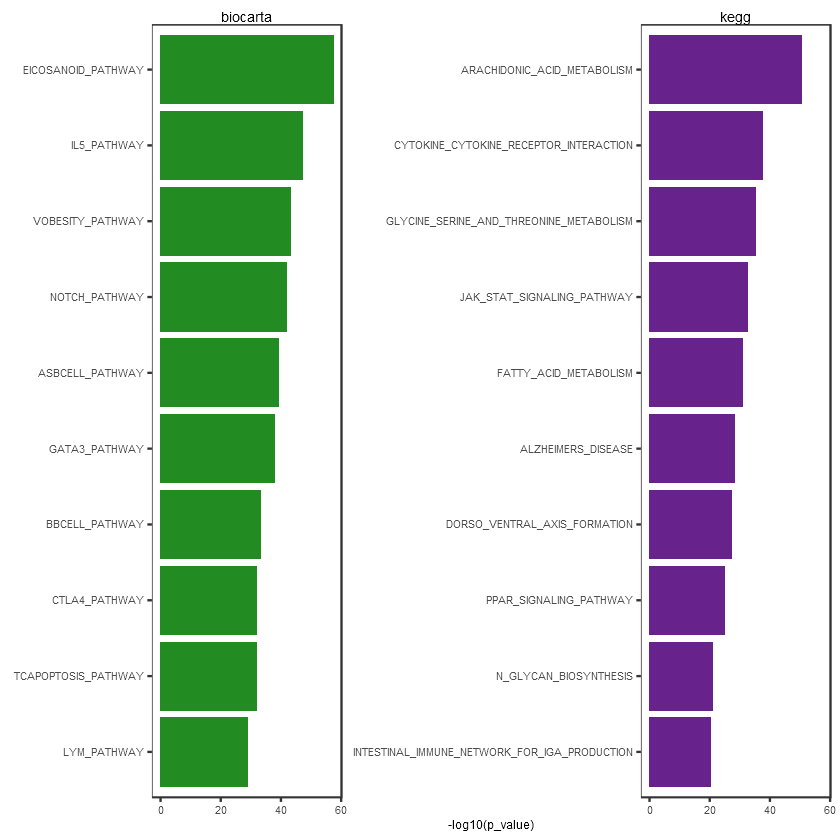

In [10]:
library(stringr)
df$path = sapply(df$path, function(x) str_remove(x, 'KEGG_'))
df$path = sapply(df$path, function(x) str_remove(x, 'BIOCARTA_'))
sub = df[c(1:18, 20, 22),]
sub$path = factor(sub$path, levels = rev(sub$path))
ggplot(sub, aes(y = -log10(pvals), x = path, fill = origin)) + geom_col() + coord_flip() +
  #scale_x_discrete(position = 'top') + 
  facet_wrap('origin', scales = 'free_y') +
  scale_fill_manual(values = c('forestgreen', 'darkorchid4')) + 
  guides(fill = FALSE) + 
  labs(y = '-log10(p_value)', x = element_blank()) + remove_grid + Axis_themes +
  theme(strip.background = element_blank(), strip.text = element_blank()) 
ggsave('pathways.pdf', height = 3, width = 6, useDingbats = FALSE)